# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [18]:
# Install required packages (if not available on server, uncomment the lines below)
!pip3 install --upgrade pip
!pip3 install getdist
!pip3 install numpy
!pip3 install scipy
!pip3 install matplotlib



  Using cached pip-26.0.1-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-26.0.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: C:\Users\serge\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\serge\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: C:\Users\serge\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: C:\Users\serge\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: C:\Users\serge\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: C:\Users\serge\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [ ]:
 #Load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate
%pip install getdist
#for some reason getdist didn't load properly had to do it myself 

# import pylab
import getdist, IPython, time
from numpy import random

# from IPython.display import Image
from getdist import plots, MCSamples, loadMCSamples

# just for printing! calculations should be performed with machine precision
%precision 3

  Using cached getdist-1.7.5-py3-none-any.whl.metadata (13 kB)
Using cached getdist-1.7.5-py3-none-any.whl (834 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


'%.3f'

(NB: Those equations that you will need to build your code are those $\boxed{\text{with a box around}}$)

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our current "Standard" cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a} 
$$
Where the dot signifies a time derivative $\dot a \equiv da/dt $

The Einstein Equations in a **homogeneous and isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model (and at late enough times), this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\boxed{
\Omega_m + \Omega_\Lambda + \Omega_k = 1
}
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.
In this consideration we are neglecting the contribution of the radiation which becomes negligable after the early stages of expansion.


The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\, \times 100 \left[\frac{ \,\text{km}}{\text{s Mpc}}\right]
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec)  $pc = 3.086 \cdot 10^{16}$ m.

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

## <span style='color:orange'> Excersise 1 </span>

Write your own code for the Hubble parameter as a function of redshift (z) note that $a = \frac{1}{1+z}$. Make a plot to see if your function works as expected.

In [ ]:
# Hubble rate

#i've used these cites here, they have other references 
#http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/denpar.html - omegaa parameters 
#https://doi.org/10.1016/j.physrep.2019.02.001 - omegas again 
#https://lambda.gsfc.nasa.gov/education/graphic_history/hubb_const.html - H_0


#define stuff we need for the formula 
pc=3.086*10**16 #m
mpc = 3.086*10**19 #km 
Om_L=0.73
Om_m=0.27
Om_k= 1 - Om_m - Om_L
Om_rel = 8.24e-5 #8.24 x 10-5
H_0 = 70 * 1000 / mpc #70 is mult. by 100 based on the formula
h = 0.7

print('Our constants are:', Om_k, Om_L, Om_m)

def Hubble(z):
    return (H_0**2 * (Om_L + Om_k*(1+z)**2 + Om_m*(1+z)**3 + Om_rel*(1+z)**4))**0.5# <--- YOUR CODE GOES HERE!

print(Hubble(0))

Our constants are: 0.0 0.73 0.27
2.26840194233934e-15


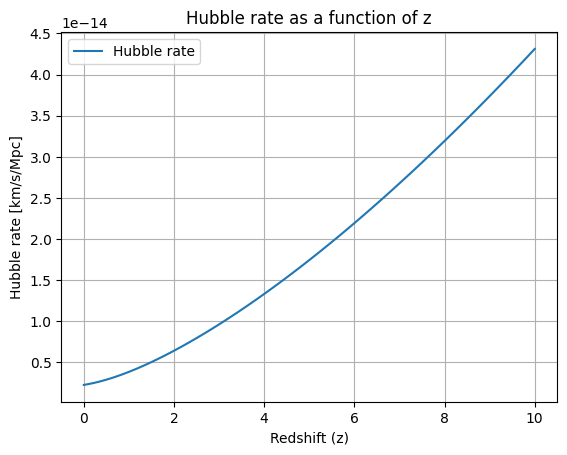

In [128]:
#let's plot the thing!

z = np.linspace(0, 10, 100) #our z would be 1 number only so we need many of them 
plt.plot(z, Hubble(z), label='Hubble rate') #z and functon of z 
plt.xlabel('Redshift (z)')
plt.title('Hubble rate as a function of z')
plt.ylabel('Hubble rate [km/s/Mpc]')
plt.legend()
plt.grid()
plt.show()

So as a function of redshift Hubble rate increases, I believe this should be the case since everything is moving away from us makaing the Hubble rate increase too.

##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \,\sinh\left(\sqrt{\Omega_k}\,D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \,\sin\left(\sqrt{-\Omega_k}\,D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_Lambda)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator, for example implementin the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) or your favourite alternative, or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $h$, which is $H_0$ measured in units of 100 km/s/Mpc!

## <span style='color:orange'> Excersise 2 </span>

Define a function that calculate the luminosty distance in flat ($\Omega_k = 0$) and both possitively and negatively curved  ($\Omega_k \neq 0$) spacetime.

In [134]:
#import integration 
from scipy.integrate import quad 

#define c 
c = 2.998e8 #ms^-1

import numpy as np
from scipy.integrate import quad


def D(z):
    integral , _ = quad(lambda Z: 1.0 / Hubble(Z), 0, z)
    H_0= 71 * 1000 / mpc

    return H_0 * integral 


def theor_luminosity_distance(z, H_0, Om_m, Om_k):
    if Om_k > 0: 
        return (c/H_0) *(1+z) * (1/(np.sqrt(Om_k))) * np.sinh(np.sqrt(Om_k) * D(z))
    elif Om_k == 0:
        return (c/(H_0)) *(1+z) *D(z)
    elif Om_k < 0: 
        return (c/(H_0)) *(1+z) *(1/(np.sqrt(-Om_k))) * np.sinh(np.sqrt(-(Om_k)) * D(z))

print(theor_luminosity_distance(1, H_0, Om_m, Om_k)) 


#CHECK UNITS!!! P.S. WE'RE GOOD (I THINK...)



2.1062199871285222e+23


## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [ ]:
import os, io, urllib.request
dataloc = "SCPUnion2.1_mu_vs_z.txt"  # local file
# If local file not found, download from Wayback Machine (original URL is down) 
if not os.path.exists(dataloc):     
    print("Local file not found, downloading from Wayback Machine...")     
    url = "https://web.archive.org/web/2023id_/http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"     
    req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})     
    response = urllib.request.urlopen(req)     
    content = response.read().decode()     
    with open(dataloc, 'w') as f:         
        f.write(content)     
        print("Downloaded and saved locally.")
# Read in data as numpy array. 
# Format is [name, redshift, magnitude, magnitude error, and another number?] 
data = np.genfromtxt(dataloc)
# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number') 
display(data[0])

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')

dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
#data = np.genfromtxt(dataloc)

#did as in the mail, I trust the mighty code gods 


array([           nan, 2.84880000e-02, 3.53465834e+01, 2.23905933e-01,
       1.28418942e-01])

In [ ]:
# Extract the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
# Data are in columns, so we either slice it by columns: arr[:,n]...
zs = data[:,1] # redshift
#print(len(zs))
#checked, prints 580
# ...or transpose the array and then slice by row: arr_transposed[n]
distance_modulus = data.T[2] # distance modulus
error_distance_modulus = data.T[3] # errors on distance modulus = sigmas

580


In [176]:
# Let's look at the data, just for fun.
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once with something like:
#     array_2 = some_function_of(array_1)

# luminosity distance in pc
luminosity_distance_pc = 10. * 10.**(distance_modulus / 5.)

# and in Mpc
luminosity_distance_Mpc = luminosity_distance_pc / 10.**6

# and the error on that distance:
error_luminosity_distance_Mpc = 5. * (10.**((distance_modulus + error_distance_modulus)/5.-6.) - 10.**((distance_modulus - error_distance_modulus)/5.-6.))

#print(error_luminosity_distance_Mpc)
#print(zs)
#checks what we have, it is an array yipee



Okay so we setup arrays in Mpc, pc and z's. These are multiplied and changed according to what was done for us above. We use these later to compare data to theory. 

Recommendation: plot the data so you can see the luminosity distance and distance modulus as a function of the redshift

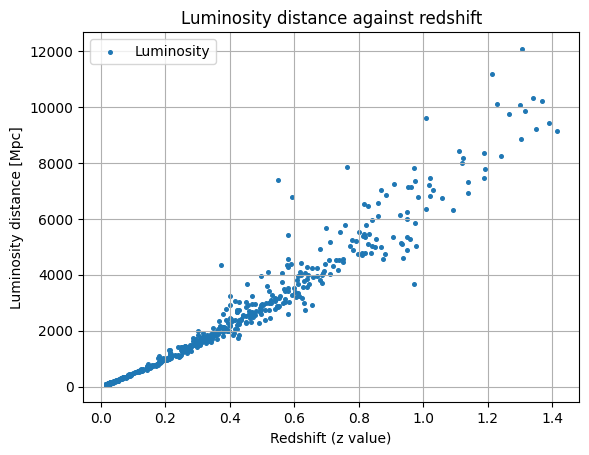

In [178]:
%matplotlib inline

plt.scatter(zs, luminosity_distance_Mpc, label='Luminosity', s=6.7)
plt.xlabel('Redshift (z value)')
plt.title('Luminosity distance against redshift')
plt.ylabel('Luminosity distance [Mpc]')
plt.grid()
plt.legend()
plt.show()

#we simply plot it here



In [ ]:
#okay we should probably make omegas and stuff configurable and global to test

## <span style='color:orange'> Excersise 3 </span>

Now also define a function to calculate the distance modulus using your previously defined luminosity distance function. Use these functions to plot the theoretical curves as a function of redshift and compare with the data. (Does the line go through the data points?)

In [ ]:

def theor_distance_modulus(arg):
    return # <--- YOUR CODE GOES HERE!

Try your functions here. Make atleast two plots to check that for $\Omega_m = 0.3$, $\Omega_\Lambda = 0.7$ and $h =0.7$ your theory calculations of the luminosity distance and the distance modulus match okay to the data for redshifts ranging from ~0.1 to 2.

In [ ]:
%matplotlib inline


## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*).
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$.
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.).

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood.

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied.
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)

* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
* If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

##  <span style='color:orange'> Excersise 4 </span>

Write your own code to perform a Monte Carlo Markov Chain. Note that your algorithm should be robust and converge to the correct parameters even for poor initial guesses.

In [ ]:
from random import random
from random import gauss
import sys


def calculate_chi2(arg):
    
    return # <--- YOUR CODE GOES HERE!

filename = "MC_Chain_SNIa.txt"
file = open(filename,"w")

#  define Initial guess/value parameters
# <-- YOUR CODE GOES HERE! 


print("Progress: ")

start = time.time()


# <-- YOUR CODE GOES HERE! 


print("Done! Acceptance ratio = ", N_steps/total)
file.close();

end = time.time()
print('time required: {:.2f} s'.format(end-start))

After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h`

`0.297     0.703    0.698`

`0.285     0.715    0.701`

`0.288     0.712    0.699`

`...`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

##  <span style='color:orange'> Excersise 5 </span>

Use the GetDist functions in the example given underneath but with your **own** MCMC data to generate investigate the sampling of the MCMC.

In [ ]:
filename = "MC_Chain_SNIa.txt"
datafile = np.loadtxt(filename,
                      skiprows=int(0.3 * N_steps)) # remove some burn-in

h, OmegaM, OmegaL, chi2 = datafile[:,1], datafile[:,2], datafile[:,3], datafile[:,4]

# You can easily create new np.arrays that are functions of other np.arrays
Omegak = 1. - OmegaM - OmegaL

# Let's define variable names and labels
my_labels = [r'h', r'\Omega_m', r'\Omega_\Lambda', r'\Omega_k']
my_names = ['h', 'OmegaM', 'OmegaL', 'Omegak']
my_dim = len(my_names) # The number of variables we're plotting

# This creates a higher-dimensional array with all our data, shaped in the appropriate way...
my_samples = np.transpose(np.reshape([h, OmegaM, OmegaL, Omegak], (my_dim, len(h))))
print(np.shape(my_samples))

# ... to create an "MCSamples" data type, which GetDist can use
my_samples = MCSamples(samples = my_samples, labels = my_labels, names = my_names)

# The usual 1-sigma confidence level. You can change to 2- or 3-sigma if you want
conf_level = 0.6827

# This prints a table with the 1D posteriors (confidence levels)
for nam in my_names:
    print(round(my_samples.confidence(nam,(1.-conf_level)/2.,upper=False),2), \
          " < ", nam , " < ", round(my_samples.confidence(nam,(1.-conf_level)/2.,upper=True),2),\
          " at " , int(100*conf_level),"\b% CL")
print("\n")

#Triangle corner plot
j = plots.getSubplotPlotter(subplot_size=3)
j.settings.axes_labelsize = 22
j.settings.axes_fontsize = 16
j.triangle_plot(my_samples, filled = True, title_limit=1)

In [ ]:
print(my_samples.getParamNames())

##  <span style='color:orange'> Excersise 6 </span>

Show the curves for $d_L$ and/or $\mu$ as a function of redshift using the best fit parameters determined using your MCMC code, so you will need to make use of your earlier defined functions for $d_L$ and $\mu$ . Check if this correctly reproduces the data. Additionally, provide an extimate on the error and plot the corresponding confidence intervals based on the sample that your MCMC code produces. 

In [ ]:

##Example of how to get the confidence intervals from your MCMC samples
h_min = my_samples.confidence('h',(1.-conf_level)/2.,upper=False)
h_max = my_samples.confidence('h',(1.-conf_level)/2.,upper=True)
Omega_M_min = my_samples.confidence('OmegaM',(1.-conf_level)/2.,upper=False)
Omega_M_max = my_samples.confidence('OmegaM',(1.-conf_level)/2.,upper=True)
Omega_L_min = my_samples.confidence('OmegaL',(1.-conf_level)/2.,upper=False)
Omega_L_max = my_samples.confidence('OmegaL',(1.-conf_level)/2.,upper=True)




##<-- YOUR CODE GOES HERE!  calculate d_L and mu as a function of z using the best fit parameters from MCMC




#print best fit values coming from MCMC
print(h_best,Omega_M_best,Omega_L_best)




# plot your d_L and mu together with the data to compare
